In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

In [3]:
for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, -1, -2, -3) # short distance
    # y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# 1. linear model - 분류 
i = Input(shape = (T, ))
x = Dense(1, activation = 'sigmoid')(i)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01),
             metrics = ['accuracy'])

C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
r = model.fit(X, Y, epochs = 100, validation_split = 0.5)

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5096 - val_loss: 0.6931 - val_accuracy: 0.5076
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5196 - val_loss: 0.6938 - val_accuracy: 0.5160
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5140 - val_loss: 0.6950 - val_accuracy: 0.5028
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5104 - val_loss: 0.6941 - val_accuracy: 0.5112
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5072 - val_loss: 0.6939 - val_accuracy: 0.5224
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5004 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5220 - val_loss: 0.6949 - val_accuracy: 0.5060
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5040 - val_loss: 0.6947 - val_accuracy: 0.5028
Epoch 60/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5004
Epoch 61/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5092 - val_loss: 0.6951 - val_accuracy: 0.5028
Epoch 62/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5092 - val_loss: 0.6940 - val_accuracy: 0.5036
Epoch 63/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5052 - val_loss: 0.6939 - val_accuracy: 0.5064
Epoch 64/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5196 - val_loss: 0.6940 - val_accuracy: 0.5004
Epoch 65/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5196 - val_loss: 0.6948 - val_accuracy: 0.5228
Epoch 

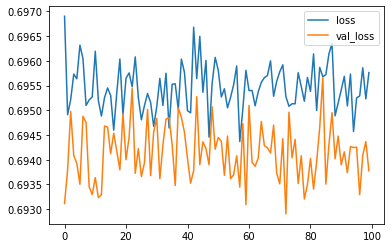

In [7]:
# loss 그래프
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

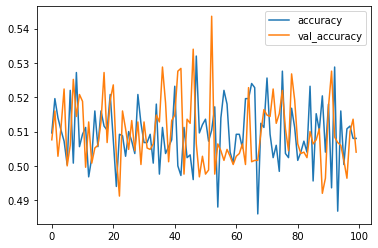

In [8]:
# 정확도 그래프
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [10]:
# make a simple RNN
inputs = np.expand_dims(X, -1) # 차원 확장

i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01),
             metrics = ['accuracy'])

In [11]:
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 1s 4ms/step - loss: 0.6802 - accuracy: 0.5824 - val_loss: 0.6576 - val_accuracy: 0.6292
Epoch 2/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6948 - val_loss: 0.5820 - val_accuracy: 0.7672
Epoch 3/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8020 - val_loss: 0.4870 - val_accuracy: 0.8316
Epoch 4/200
79/79 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.8368 - val_loss: 0.4196 - val_accuracy: 0.8556
Epoch 5/200
79/79 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8488 - val_loss: 0.3780 - val_accuracy: 0.8548
Epoch 6/200
79/79 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8552 - val_loss: 0.3550 - val_accuracy: 0.8636
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8680 - val_loss: 0.3342 - val_accuracy: 0.8672
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.9800 - val_loss: 0.0922 - val_accuracy: 0.9768
Epoch 60/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9764 - val_loss: 0.0945 - val_accuracy: 0.9764
Epoch 61/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9788 - val_loss: 0.1064 - val_accuracy: 0.9708
Epoch 62/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9780 - val_loss: 0.0994 - val_accuracy: 0.9720
Epoch 63/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9780 - val_loss: 0.0992 - val_accuracy: 0.9760
Epoch 64/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0732 - accuracy: 0.9800 - val_loss: 0.1044 - val_accuracy: 0.9736
Epoch 65/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9808 - val_loss: 0.0958 - val_accuracy: 0.9768
Epoch 

79/79 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9896 - val_loss: 0.0639 - val_accuracy: 0.9880
Epoch 174/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9908 - val_loss: 0.0681 - val_accuracy: 0.9856
Epoch 175/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 0.0703 - val_accuracy: 0.9880
Epoch 176/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9900 - val_loss: 0.0779 - val_accuracy: 0.9876
Epoch 177/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9940 - val_loss: 0.0745 - val_accuracy: 0.9864
Epoch 178/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9920 - val_loss: 0.1069 - val_accuracy: 0.9788
Epoch 179/200
79/79 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9868 - val_loss: 0.0833 - val_accuracy: 0.9852
Epoch 180/200

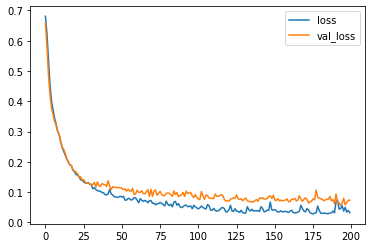

In [12]:
# loss 그래프
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

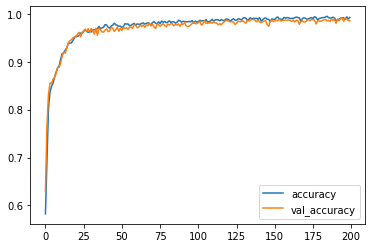

In [13]:
# 정확도 그래프
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
# SimpleRNN 사용하니까 정확도가 좋아짐.

In [14]:
# Change to the long distance problem
T = 10
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [16]:
# 2. make a simple RNN (long distance)
inputs = np.expand_dims(X, -1) # 차원 확장

i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01),
             metrics = ['accuracy'])
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 1s 4ms/step - loss: 0.6990 - accuracy: 0.5084 - val_loss: 0.6968 - val_accuracy: 0.5160
Epoch 2/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5088 - val_loss: 0.6956 - val_accuracy: 0.5080
Epoch 3/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5180 - val_loss: 0.7000 - val_accuracy: 0.5076
Epoch 4/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5208 - val_loss: 0.6950 - val_accuracy: 0.5076
Epoch 5/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5248 - val_loss: 0.6933 - val_accuracy: 0.5140
Epoch 6/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5288 - val_loss: 0.6920 - val_accuracy: 0.5196
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5420 - val_loss: 0.6915 - val_accuracy: 0.5168
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8840 - val_loss: 0.3878 - val_accuracy: 0.8664
Epoch 60/200
79/79 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8864 - val_loss: 0.2717 - val_accuracy: 0.9172
Epoch 61/200
79/79 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8424 - val_loss: 0.4091 - val_accuracy: 0.8552
Epoch 62/200
79/79 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8968 - val_loss: 0.3282 - val_accuracy: 0.8896
Epoch 63/200
79/79 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8900 - val_loss: 0.2799 - val_accuracy: 0.9176
Epoch 64/200
79/79 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8692 - val_loss: 0.3934 - val_accuracy: 0.8612
Epoch 65/200
79/79 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.9004 - val_loss: 0.3024 - val_accuracy: 0.9036
Epoch 

79/79 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9728 - val_loss: 0.0878 - val_accuracy: 0.9812
Epoch 174/200
79/79 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9736 - val_loss: 0.1086 - val_accuracy: 0.9672
Epoch 175/200
79/79 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.9760 - val_loss: 0.0964 - val_accuracy: 0.9784
Epoch 176/200
79/79 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8652 - val_loss: 0.2930 - val_accuracy: 0.9032
Epoch 177/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9328 - val_loss: 0.2517 - val_accuracy: 0.9208
Epoch 178/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9072 - val_loss: 0.2370 - val_accuracy: 0.9320
Epoch 179/200
79/79 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9456 - val_loss: 0.1704 - val_accuracy: 0.9580
Epoch 180/200

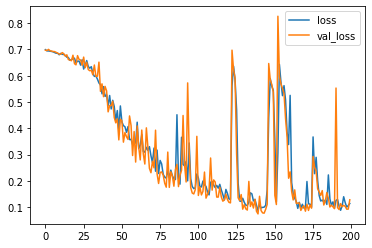

In [17]:
# loss 그래프
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

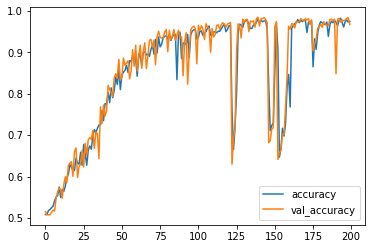

In [18]:
# 정확도 그래프
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [19]:
# 3. make a LSTM (long distance)
inputs = np.expand_dims(X, -1) # 차원 확장

i = Input(shape = (T, D))
x = LSTM(5)(i)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01),
             metrics = ['accuracy'])
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 2s 6ms/step - loss: 0.6948 - accuracy: 0.5052 - val_loss: 0.6930 - val_accuracy: 0.5152
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5056 - val_loss: 0.6927 - val_accuracy: 0.5184
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5204 - val_loss: 0.6934 - val_accuracy: 0.5048
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5316 - val_loss: 0.6953 - val_accuracy: 0.5096
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5296 - val_loss: 0.6930 - val_accuracy: 0.5116
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5396 - val_loss: 0.6931 - val_accuracy: 0.5248
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5456 - val_loss: 0.6759 - val_accuracy: 0.5512
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9692 - val_loss: 0.1079 - val_accuracy: 0.9672
Epoch 60/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.9704 - val_loss: 0.1140 - val_accuracy: 0.9636
Epoch 61/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.9732 - val_loss: 0.1119 - val_accuracy: 0.9652
Epoch 62/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9716 - val_loss: 0.1206 - val_accuracy: 0.9612
Epoch 63/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0946 - accuracy: 0.9736 - val_loss: 0.1060 - val_accuracy: 0.9652
Epoch 64/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9716 - val_loss: 0.1305 - val_accuracy: 0.9544
Epoch 65/200
79/79 [==============================] - 0s 3ms/step - loss: 0.1156 - accuracy: 0.9664 - val_loss: 0.1555 - val_accuracy: 0.9552
Epoch 

79/79 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9908 - val_loss: 0.0656 - val_accuracy: 0.9844
Epoch 174/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9928 - val_loss: 0.0729 - val_accuracy: 0.9800
Epoch 175/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9892 - val_loss: 0.0809 - val_accuracy: 0.9820
Epoch 176/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9904 - val_loss: 0.0612 - val_accuracy: 0.9860
Epoch 177/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9912 - val_loss: 0.0652 - val_accuracy: 0.9852
Epoch 178/200
79/79 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9912 - val_loss: 0.0639 - val_accuracy: 0.9836
Epoch 179/200
79/79 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9928 - val_loss: 0.0619 - val_accuracy: 0.9852
Epoch 180/200

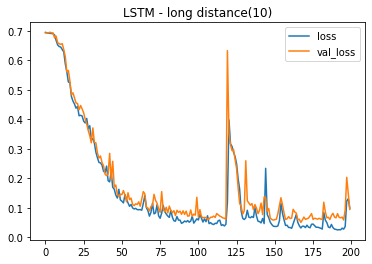

In [22]:
# loss 그래프
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('LSTM - long distance(10)')
plt.legend()
plt.show()

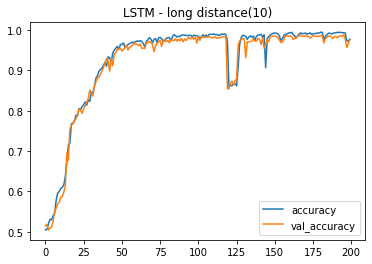

In [23]:
# 정확도 그래프
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('LSTM - long distance(10)')
plt.legend()
plt.show()

In [ ]:
# long distance이면 RNN보다 LSTM을 사용하는 것이 더 낫다.

In [24]:
# Make the problem harder by making T larger(time series 더 늘리기)
T = 20
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [25]:
# 4. make a simple RNN (long distance(20))
inputs = np.expand_dims(X, -1) # 차원 확장

i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01),
             metrics = ['accuracy'])
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 1s 4ms/step - loss: 0.6959 - accuracy: 0.5044 - val_loss: 0.6940 - val_accuracy: 0.5048
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5168 - val_loss: 0.6943 - val_accuracy: 0.5040
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4992 - val_loss: 0.6942 - val_accuracy: 0.4980
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5020 - val_loss: 0.6952 - val_accuracy: 0.5020
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5128 - val_loss: 0.6935 - val_accuracy: 0.4976
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5180 - val_loss: 0.6931 - val_accuracy: 0.4980
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5056 - val_loss: 0.6947 - val_accuracy: 0.5060
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5032 - val_loss: 0.6927 - val_accuracy: 0.5172
Epoch 60/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4996 - val_loss: 0.6946 - val_accuracy: 0.5016
Epoch 61/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5164 - val_loss: 0.6933 - val_accuracy: 0.5200
Epoch 62/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5208 - val_loss: 0.6929 - val_accuracy: 0.5136
Epoch 63/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5156 - val_loss: 0.6938 - val_accuracy: 0.5100
Epoch 64/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5052 - val_loss: 0.6921 - val_accuracy: 0.5108
Epoch 65/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5228 - val_loss: 0.6981 - val_accuracy: 0.4972
Epoch 

79/79 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6946 - val_accuracy: 0.5028
Epoch 174/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5156 - val_loss: 0.6942 - val_accuracy: 0.5060
Epoch 175/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5268 - val_loss: 0.6949 - val_accuracy: 0.5036
Epoch 176/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5208 - val_loss: 0.6941 - val_accuracy: 0.5012
Epoch 177/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5044 - val_loss: 0.6955 - val_accuracy: 0.5012
Epoch 178/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5176 - val_loss: 0.6950 - val_accuracy: 0.4984
Epoch 179/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5008 - val_loss: 0.6941 - val_accuracy: 0.5068
Epoch 180/200

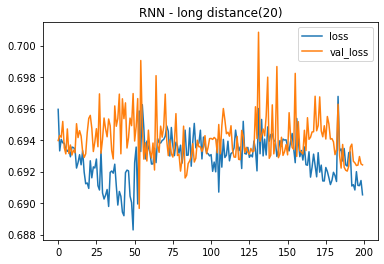

In [26]:
# loss 그래프
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('RNN - long distance(20)')
plt.legend()
plt.show()

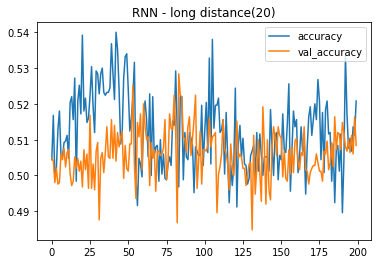

In [27]:
# 정확도 그래프
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('RNN - long distance(20)')
plt.legend()
plt.show()

In [28]:
# 5. make a LSTM (long distance(20))
inputs = np.expand_dims(X, -1) # 차원 확장

i = Input(shape = (T, D))
x = LSTM(5)(i)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01),
             metrics = ['accuracy'])
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 2s 8ms/step - loss: 0.6942 - accuracy: 0.4968 - val_loss: 0.6930 - val_accuracy: 0.5092
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5168 - val_loss: 0.6929 - val_accuracy: 0.5108
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5060 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5040 - val_loss: 0.6935 - val_accuracy: 0.5084
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5200 - val_loss: 0.6929 - val_accuracy: 0.5144
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5216 - val_loss: 0.6930 - val_accuracy: 0.5088
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5036 - val_loss: 0.6933 - val_accuracy: 0.5100
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6849 - accuracy: 0.5480 - val_loss: 0.6956 - val_accuracy: 0.5200
Epoch 60/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.5452 - val_loss: 0.6958 - val_accuracy: 0.5208
Epoch 61/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.5508 - val_loss: 0.6971 - val_accuracy: 0.5136
Epoch 62/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.5536 - val_loss: 0.6956 - val_accuracy: 0.5200
Epoch 63/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6851 - accuracy: 0.5492 - val_loss: 0.6948 - val_accuracy: 0.5180
Epoch 64/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6828 - accuracy: 0.5584 - val_loss: 0.6959 - val_accuracy: 0.5188
Epoch 65/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6828 - accuracy: 0.5576 - val_loss: 0.6985 - val_accuracy: 0.5112
Epoch 

79/79 [==============================] - 0s 5ms/step - loss: 0.5407 - accuracy: 0.7236 - val_loss: 0.5428 - val_accuracy: 0.7260
Epoch 174/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5292 - accuracy: 0.7336 - val_loss: 0.5282 - val_accuracy: 0.7436
Epoch 175/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5053 - accuracy: 0.7464 - val_loss: 0.5135 - val_accuracy: 0.7392
Epoch 176/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.7468 - val_loss: 0.5025 - val_accuracy: 0.7560
Epoch 177/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4833 - accuracy: 0.7588 - val_loss: 0.5127 - val_accuracy: 0.7528
Epoch 178/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4714 - accuracy: 0.7668 - val_loss: 0.4978 - val_accuracy: 0.7660
Epoch 179/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4846 - accuracy: 0.7652 - val_loss: 0.5124 - val_accuracy: 0.7488
Epoch 180/200

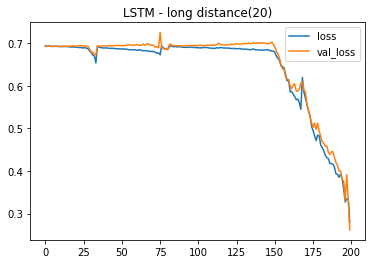

In [29]:
# loss 그래프
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('LSTM - long distance(20)')
plt.legend()
plt.show()

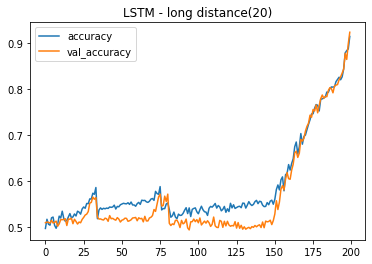

In [30]:
# 정확도 그래프
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('LSTM - long distance(20)')
plt.legend()
plt.show()

In [31]:
# 6. make a GRU(long distance(20))
inputs = np.expand_dims(X, -1) # 차원 확장

i = Input(shape = (T, D))
x = GRU(5)(i)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01),
             metrics = ['accuracy'])
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.6959 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5144
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.5136 - val_loss: 0.6932 - val_accuracy: 0.5116
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5156 - val_loss: 0.6934 - val_accuracy: 0.5100
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5116 - val_loss: 0.6934 - val_accuracy: 0.5024
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5128
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5068 - val_loss: 0.6930 - val_accuracy: 0.5096
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5108 - val_loss: 0.6931 - val_accuracy: 0.4976
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4438 - accuracy: 0.7316 - val_loss: 0.4566 - val_accuracy: 0.7264
Epoch 60/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4346 - accuracy: 0.7560 - val_loss: 0.4511 - val_accuracy: 0.7488
Epoch 61/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4166 - accuracy: 0.7656 - val_loss: 0.4393 - val_accuracy: 0.7524
Epoch 62/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4090 - accuracy: 0.7884 - val_loss: 0.4327 - val_accuracy: 0.7760
Epoch 63/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3972 - accuracy: 0.7816 - val_loss: 0.4216 - val_accuracy: 0.7840
Epoch 64/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3919 - accuracy: 0.7988 - val_loss: 0.4053 - val_accuracy: 0.7860
Epoch 65/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3708 - accuracy: 0.8120 - val_loss: 0.3998 - val_accuracy: 0.7972
Epoch 

79/79 [==============================] - 0s 6ms/step - loss: 0.0470 - accuracy: 0.9892 - val_loss: 0.0746 - val_accuracy: 0.9804
Epoch 174/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0447 - accuracy: 0.9904 - val_loss: 0.0722 - val_accuracy: 0.9816
Epoch 175/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0472 - accuracy: 0.9872 - val_loss: 0.1082 - val_accuracy: 0.9784
Epoch 176/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0568 - accuracy: 0.9864 - val_loss: 0.0754 - val_accuracy: 0.9804
Epoch 177/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0458 - accuracy: 0.9888 - val_loss: 0.0650 - val_accuracy: 0.9804
Epoch 178/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0590 - accuracy: 0.9876 - val_loss: 0.0538 - val_accuracy: 0.9828
Epoch 179/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0512 - accuracy: 0.9896 - val_loss: 0.0756 - val_accuracy: 0.9808
Epoch 180/200

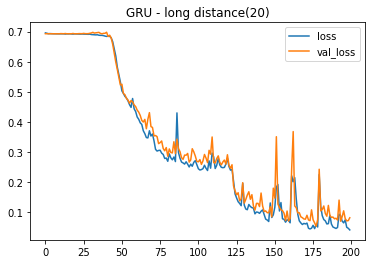

In [32]:
# loss 그래프
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('GRU - long distance(20)')
plt.legend()
plt.show()

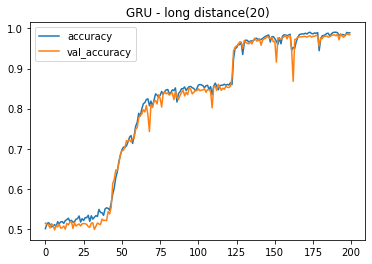

In [33]:
# 정확도 그래프
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('GRU - long distance(20)')
plt.legend()
plt.show()

In [ ]:
# GRU가 LSTM보다 파라미터가 적다일 뿐이지, 성능 딱히,,,
# 특정한 특징이 있으면 그것을 뽑아 모델을 돌리자.

In [36]:
# 7. make a LSTM(long distance(20)) + Global Max Pooling
inputs = np.expand_dims(X, -1) # 차원 확장

i = Input(shape = (T, D))
x = LSTM(5, return_sequences = True)(i) # many to many
x = GlobalMaxPool1D()(x)

x = Dense(1, activation = 'sigmoid')(x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01),
             metrics = ['accuracy'])
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 2s 8ms/step - loss: 0.6948 - accuracy: 0.4992 - val_loss: 0.6930 - val_accuracy: 0.5068
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4896 - val_loss: 0.6924 - val_accuracy: 0.4928
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4852 - val_loss: 0.6924 - val_accuracy: 0.5084
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5048 - val_loss: 0.6901 - val_accuracy: 0.4984
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.4980 - val_loss: 0.6751 - val_accuracy: 0.5420
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.5660 - val_loss: 0.6615 - val_accuracy: 0.5672
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6562 - accuracy: 0.5816 - val_loss: 0.6631 - val_accuracy: 0.5724
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.8552 - val_loss: 0.2961 - val_accuracy: 0.8568
Epoch 60/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2962 - accuracy: 0.8544 - val_loss: 0.2915 - val_accuracy: 0.8572
Epoch 61/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.8564 - val_loss: 0.2907 - val_accuracy: 0.8576
Epoch 62/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3428 - accuracy: 0.8440 - val_loss: 0.2942 - val_accuracy: 0.8572
Epoch 63/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.8548 - val_loss: 0.2897 - val_accuracy: 0.8584
Epoch 64/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.8580 - val_loss: 0.2878 - val_accuracy: 0.8616
Epoch 65/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.8576 - val_loss: 0.2871 - val_accuracy: 0.8608
Epoch 

79/79 [==============================] - 0s 6ms/step - loss: 0.0285 - accuracy: 0.9928 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 174/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9928 - val_loss: 0.0329 - val_accuracy: 0.9884
Epoch 175/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0297 - accuracy: 0.9932 - val_loss: 0.0320 - val_accuracy: 0.9888
Epoch 176/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9928 - val_loss: 0.0311 - val_accuracy: 0.9888
Epoch 177/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9932 - val_loss: 0.0312 - val_accuracy: 0.9892
Epoch 178/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9932 - val_loss: 0.0301 - val_accuracy: 0.9896
Epoch 179/200
79/79 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.9900 - val_loss: 0.0343 - val_accuracy: 0.9888
Epoch 180/200

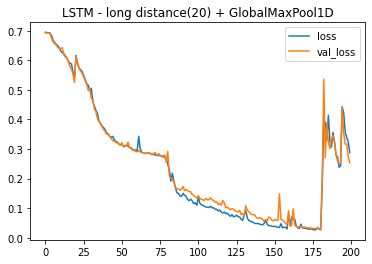

In [37]:
# loss 그래프
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('LSTM - long distance(20) + GlobalMaxPool1D')
plt.legend()
plt.show()

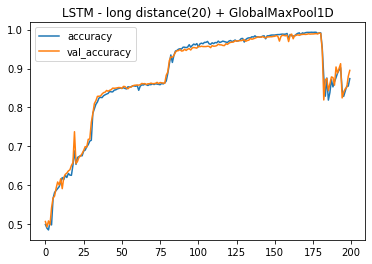

In [38]:
# 정확도 그래프
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('LSTM - long distance(20) + GlobalMaxPool1D')
plt.legend()
plt.show()

In [ ]:
# 여러 개의 layer를 중첩해서 사용하는 것이 좋다.